In [ ]:
Name = 'Parsa Ghezelbash'
Student_ID = '401110437'

Given:
- **Filter order** \( $N$ \)
- **Passband frequency** \( $f_p$ \)
- **Stopband frequency** \( $f_s$ \)
- **Passband ripple tolerance** \( $\delta_p$ \)
- **Stopband attenuation bound** \( $\delta_s$ \)

The goal is to find filter coefficients \( $h = [h_0, h_1, \ldots, h_N]$ \) such that the magnitude response \( $H(\omega)$ \) closely approximates the desired response:

$$
H_d(\omega) = \begin{cases}
1 & \text{if } \omega \leq f_p \cdot \pi \\
0 & \text{if } \omega \geq f_s \cdot \pi
\end{cases}
$$

### Frequency Response of the FIR Filter
The frequency response \( $H(\omega)$ \) of the FIR filter is given by:
$$
H(\omega) = \sum_{n=0}^{N} h_n e^{-j \omega n}
$$
where \( $h_n$ \) are the filter coefficients.

### Optimization Problem
The optimization problem can be formulated as:
$$
\min_{h} \quad \max_{\omega} |H(\omega) - H_d(\omega)|
$$
subject to:
1. Passband ripple constraint:
   $$
   |H(\omega) - 1| \leq \delta_p \quad \forall \omega \leq f_p \cdot \pi
   $$
2. Stopband attenuation constraint:
   $$
   |H(\omega)| \leq \delta_s \quad \forall \omega \geq f_s \cdot \pi
   $$

The optimization is solved using **CVXPY**, which efficiently handles convex optimization problems.



Designing filter with N=10, fp=0.2, fs=0.3


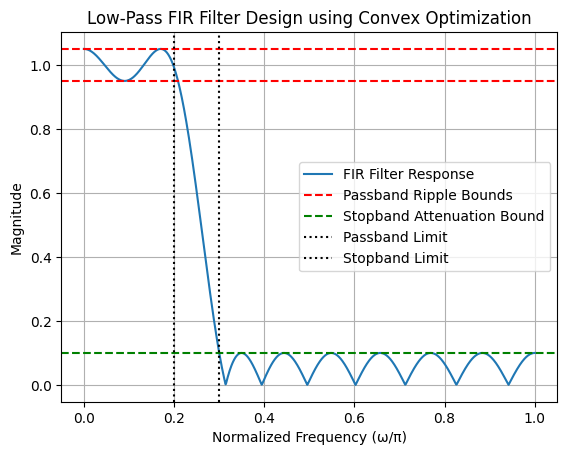


Designing filter with N=10, fp=0.25, fs=0.35


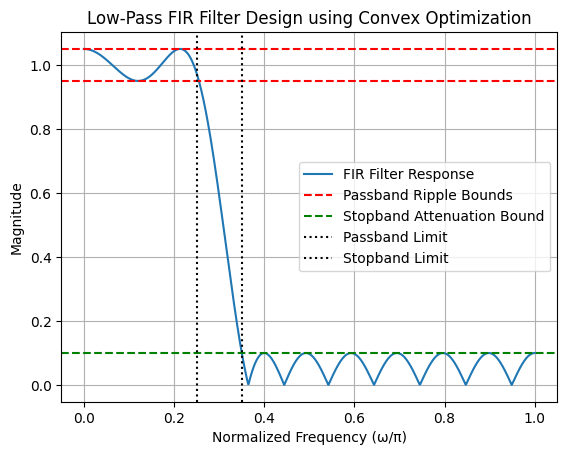


Designing filter with N=10, fp=0.3, fs=0.4


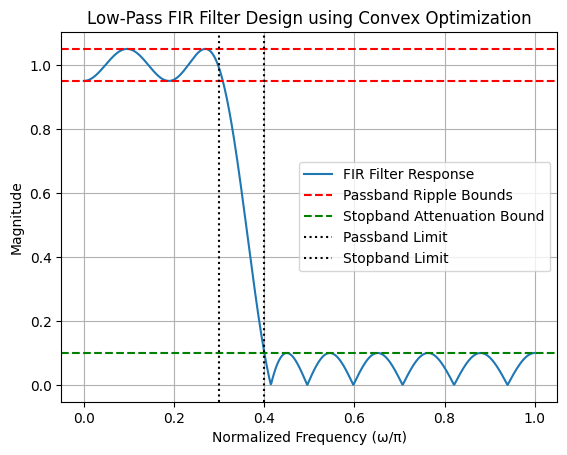


Designing filter with N=20, fp=0.2, fs=0.3


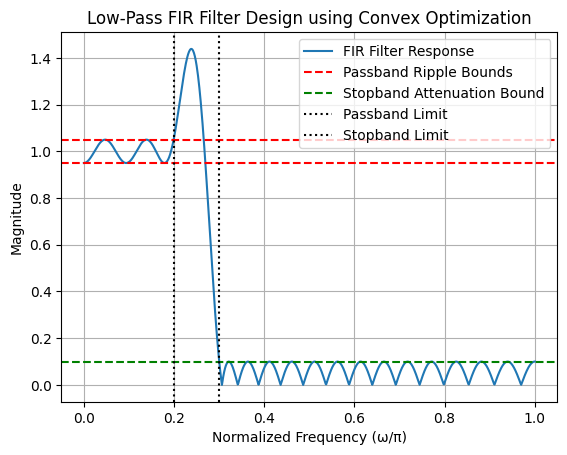


Designing filter with N=20, fp=0.25, fs=0.35


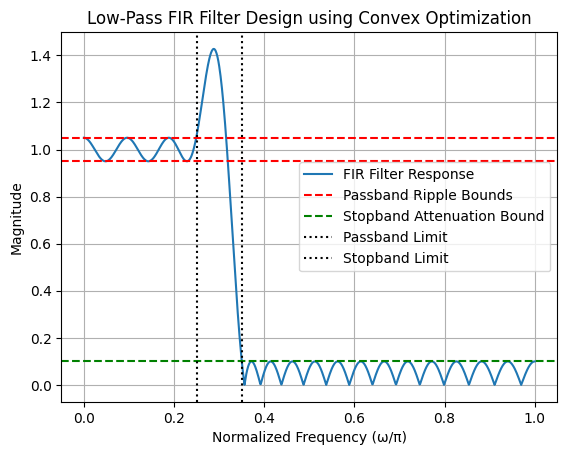


Designing filter with N=20, fp=0.3, fs=0.4


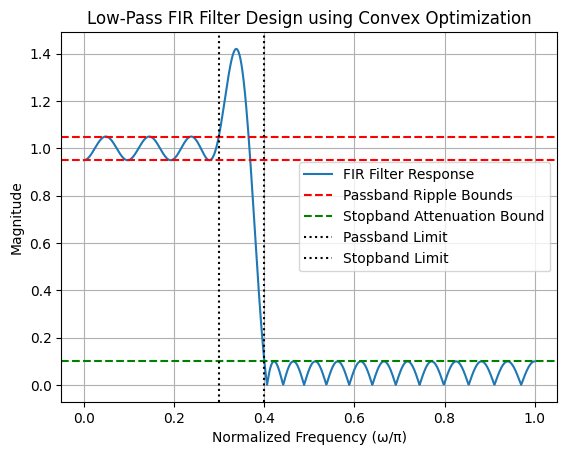


Designing filter with N=30, fp=0.2, fs=0.3


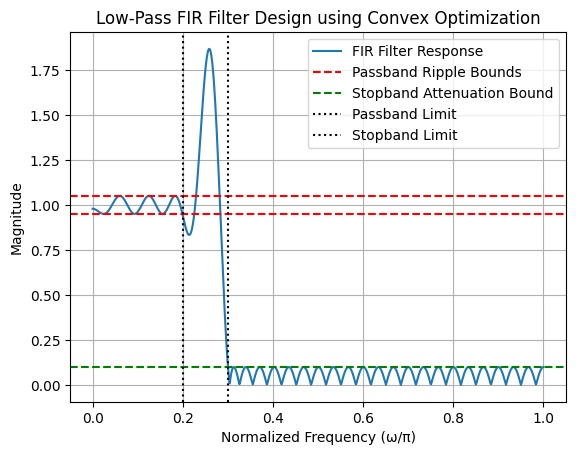


Designing filter with N=30, fp=0.25, fs=0.35


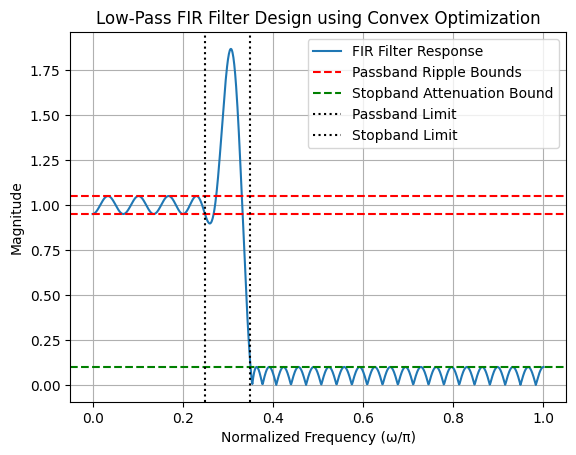


Designing filter with N=30, fp=0.3, fs=0.4


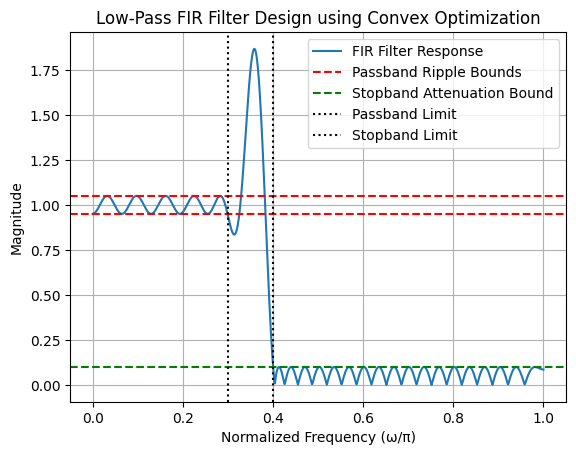

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def design_fir_filter(N, fp, fs, delta_p, delta_s):
    omega = np.linspace(0, np.pi, 1000)
    passband_indices = omega <= fp * np.pi
    stopband_indices = omega >= fs * np.pi

    h = cp.Variable(N + 1)

    H = cp.real(cp.sum([h[n] * np.exp(-1j * omega * n) for n in range(N + 1)], axis=0))

    Hd = np.ones_like(omega)
    Hd[stopband_indices] = 0

    objective = cp.Minimize(cp.max(cp.abs(H - Hd)))
    constraints = [
        cp.abs(H[passband_indices] - 1) <= delta_p,
        cp.abs(H[stopband_indices]) <= delta_s,
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    return h.value, omega, H.value


def plot_filter_response(omega, H, fp, fs, delta_p, delta_s):
    plt.plot(omega / np.pi, np.abs(H), label='FIR Filter Response')
    plt.axhline(1 + delta_p, color='red', linestyle='--', label='Passband Ripple Bounds')
    plt.axhline(1 - delta_p, color='red', linestyle='--')
    plt.axhline(delta_s, color='green', linestyle='--', label='Stopband Attenuation Bound')
    plt.axvline(fp, color='black', linestyle=':', label='Passband Limit')
    plt.axvline(fs, color='black', linestyle=':', label='Stopband Limit')
    plt.title("Low-Pass FIR Filter Design using Convex Optimization")
    plt.xlabel("Normalized Frequency (\u03c9/\u03c0)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid()
    plt.show()


# Experiment with varying parameters
filter_orders = [10, 20, 30]
passband_freqs = [0.2, 0.25, 0.3]
stopband_freqs = [0.3, 0.35, 0.4]

for N in filter_orders:
    for fp, fs in zip(passband_freqs, stopband_freqs):
        print(f"\nDesigning filter with N={N}, fp={fp}, fs={fs}")
        h_opt, omega, H_opt = design_fir_filter(N, fp, fs, delta_p=0.05, delta_s=0.1)
        plot_filter_response(omega, H_opt, fp, fs, delta_p=0.05, delta_s=0.1)
